### Imports

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from skimage import exposure
from sklearn.datasets import fetch_openml
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# SVM
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

# KNN
from sklearn.neighbors import KNeighborsClassifier

# LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


### Load MNIST dataset using scikit-learn

In [2]:
mnist = fetch_openml('mnist_784',parser='auto')

### Helping Functions

In [3]:

def compute_hog_features(image):
    feature_descriptor, hog_image = hog(image, orientations=10, pixels_per_cell=(4,4), cells_per_block=(1,1), visualize=True)
    rescaled = exposure.rescale_intensity(hog_image, in_range=(0,64))
    return feature_descriptor, rescaled

### Splitting Data

In [4]:

# Extract features (images) and labels
images, labels = mnist.data, mnist.target.astype(np.uint8)

# Split data to train(80%) and test
train_images, test_images, train_labels, test_labels = train_test_split(np.array(images), np.array(labels), test_size=0.2, random_state=42)
train_images, test_images, train_labels, test_labels = train_test_split(test_images, test_labels, test_size=0.2, random_state=42)

### Another method using tensorflow
# from tensorflow.keras import datasets
# (train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Display number of samples for train and test
print(len(train_images), len(test_images))


11200 2800


### Data Preprocessing

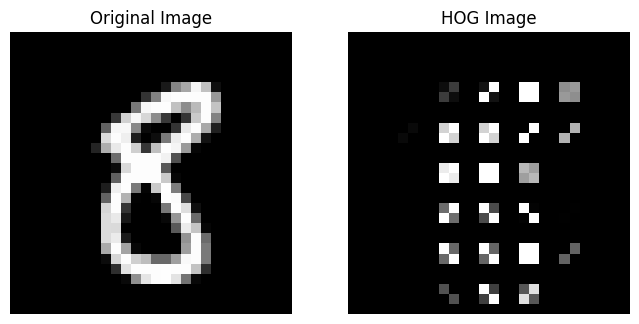

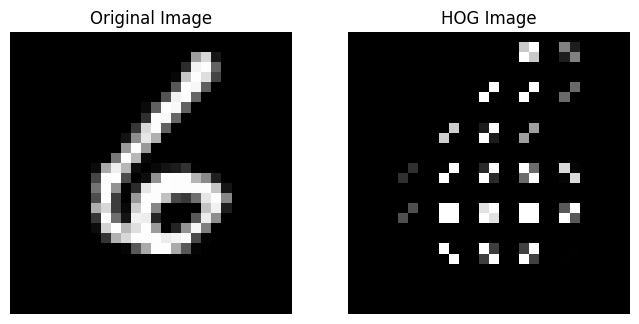

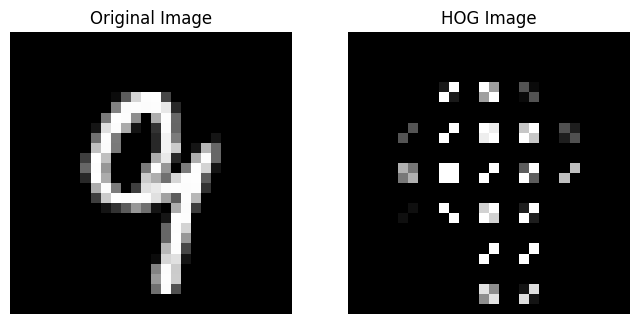

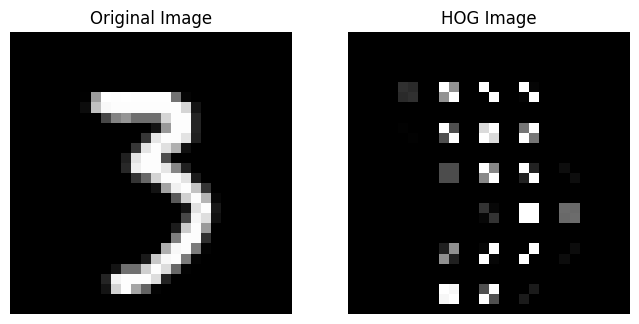

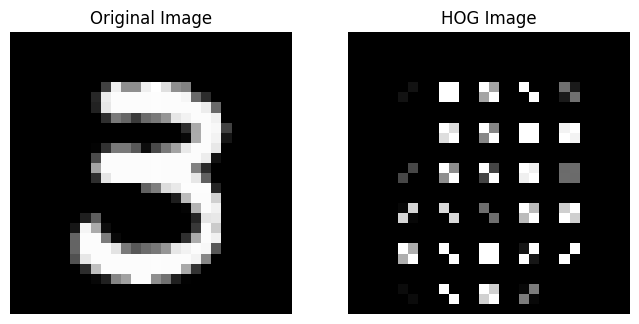

In [5]:
# Take the first 5 images for example and print them before and after HOG
for i in range(5):
    # Take example image as current i index
    example_image = train_images[i].reshape(28,28)

    # Compute HOG features for the example image
    ft, hog_example_image = compute_hog_features(example_image)

    # Plot the original and HOG images side by side
    plt.figure(figsize=(8, 4))

    # # Plot Original image
    plt.subplot(1, 2, 1)
    plt.imshow(example_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Plot hog version of image
    plt.subplot(1, 2, 2)
    plt.imshow(hog_example_image, cmap='gray')
    plt.title('HOG Image')
    plt.axis('off')

    plt.show()

In [6]:
# Run the HOG feature extraction function on the data set
hog_X_train_descriptors, hog_X_train_images = zip(*[compute_hog_features(image.reshape(28, 28)) for image in train_images])
hog_X_train_images = np.array(hog_X_train_images)
hog_X_train_descriptors = np.array(hog_X_train_descriptors)

hog_X_test_descriptors, hog_X_test_images = zip(*[compute_hog_features(image.reshape(28, 28)) for image in test_images])
hog_X_test_images = np.array(hog_X_test_images)
hog_X_test_descriptors = np.array(hog_X_test_descriptors)

# Print length of both the training and test sets
print(len(hog_X_train_images), len(hog_X_test_images))

11200 2800


In [33]:
# Define the scaler
scaler = StandardScaler()

# Fit the scaler to the features and transform
X_std = scaler.fit_transform(hog_X_train_descriptors)
X_test_std = scaler.fit_transform(hog_X_test_descriptors)

### Models

#### SVM

In [8]:
# Create an instance of the sklearn.svm.OneVsOneClassifier class.
classifier_linear = OneVsRestClassifier(SVC(kernel='linear', max_iter=30000))

# Fit the classifier to the training data.
classifier_linear.fit(hog_X_train_descriptors, train_labels)

# Make predictions on the test data.
y_pred1 = classifier_linear.predict(hog_X_test_descriptors)

# Evaluate the model.
accuracy = accuracy_score(test_labels, y_pred1)
print("Accuracy:", accuracy)

Accuracy: 0.9628571428571429


In [9]:
# Create an instance of the sklearn.svm.OneVsOneClassifier class.
classifier_linear = OneVsRestClassifier(SVC(kernel='rbf', max_iter=30000))

# Fit the classifier to the training data.
classifier_linear.fit(hog_X_train_descriptors, train_labels)

# Make predictions on the test data.
y_pred1 = classifier_linear.predict(hog_X_test_descriptors)

# Evaluate the model.
accuracy = accuracy_score(test_labels, y_pred1)
print("Accuracy:", accuracy)

Accuracy: 0.9810714285714286


In [10]:
# Create an instance of the sklearn.svm.OneVsOneClassifier class.
classifier_linear = OneVsRestClassifier(SVC(kernel='poly', max_iter=30000))

# Fit the classifier to the training data.
classifier_linear.fit(hog_X_train_descriptors, train_labels)

# Make predictions on the test data.
y_pred1 = classifier_linear.predict(hog_X_test_descriptors)

# Evaluate the model.
accuracy = accuracy_score(test_labels, y_pred1)
print("Accuracy:", accuracy)

Accuracy: 0.9839285714285714


In [11]:
gamma = [0.001, 0.011, 0.01, 0.11, 0.2]
accuracies = []
# Create an instance of the sklearn.svm.OneVsOneClassifier class.
for i in gamma:
    clf = OneVsRestClassifier(SVC(kernel='rbf', max_iter=20000, gamma=i))


    clf.fit(hog_X_train_descriptors, train_labels)

    # Make predictions on the test data.
    y_pred1 = clf.predict(hog_X_test_descriptors)

    # Evaluate the model.
    accuracies.append(accuracy_score(test_labels, y_pred1))
print("Accuracy:", accuracies)

Accuracy: [0.9439285714285715, 0.9660714285714286, 0.9646428571428571, 0.9825, 0.9728571428571429]


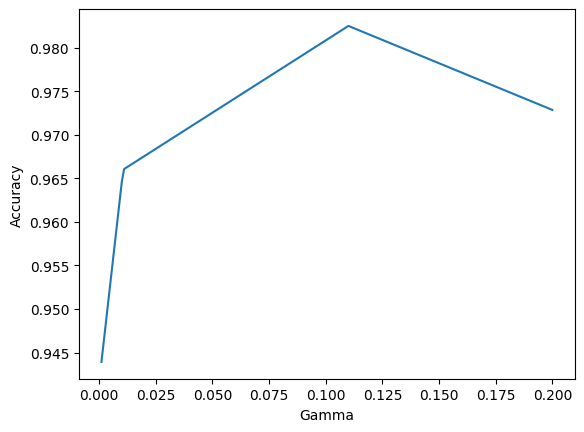

In [12]:
# Create a DataFrame from the lists
data = {'Gamma': gamma, 'Accuracy': accuracies}
df = pd.DataFrame(data)

# Use Seaborn to create a line plot
sns.lineplot(x='Gamma', y='Accuracy', data=df)

# Show the plot
plt.show()

In [13]:
degree = [1, 2, 3, 5, 8]
accuracies = []
# Create an instance of the sklearn.svm.OneVsOneClassifier class.
for i in degree:
    clf = OneVsRestClassifier(SVC(kernel='poly', max_iter=20000, degree=i))
    print(i)
    # Fit the classifier to the training data.
    clf.fit(hog_X_train_descriptors, train_labels)

    # Make predictions on the test data.
    y_pred1 = clf.predict(hog_X_test_descriptors)

    # Evaluate the model.
    accuracies.append(accuracy_score(test_labels, y_pred1))
print("Accuracy:", accuracies)

1


2
3
5
8
Accuracy: [0.9667857142857142, 0.9814285714285714, 0.9839285714285714, 0.9785714285714285, 0.9485714285714286]


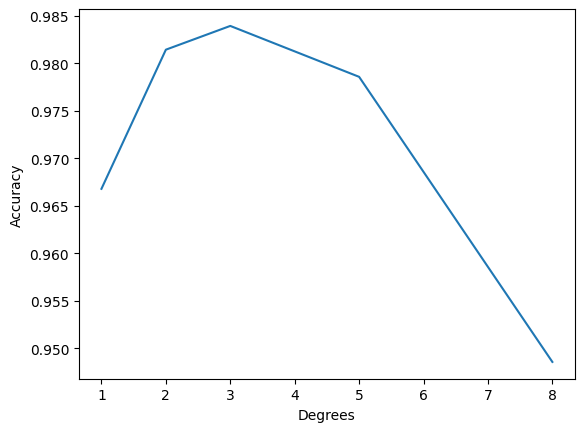

In [14]:
# Create a DataFrame from the lists
data = {'Degrees': degree, 'Accuracy': accuracies}
df = pd.DataFrame(data)

# Use Seaborn to create a line plot
sns.lineplot(x='Degrees', y='Accuracy', data=df)

# Show the plot
plt.show()

#### KNN

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Range of values for n_neighbors
neighbors_range = range(1, 20)

# Empty list to store accuracy values
accuracy_values = []

# Iterate over different values of n_neighbors
for n in neighbors_range:
    
    # Create KNN classifier with the current value of n_neighbors
    knn = KNeighborsClassifier(n_neighbors = n)
    
    # Fit the model
    knn.fit(hog_X_train_descriptors, train_labels)
    
    # Make predictions on the test dataset
    y_pred = knn.predict(hog_X_test_descriptors)
    
    # Calculate accuracy and append to the list
    acc = accuracy_score(test_labels, y_pred)
    accuracy_values.append(acc)

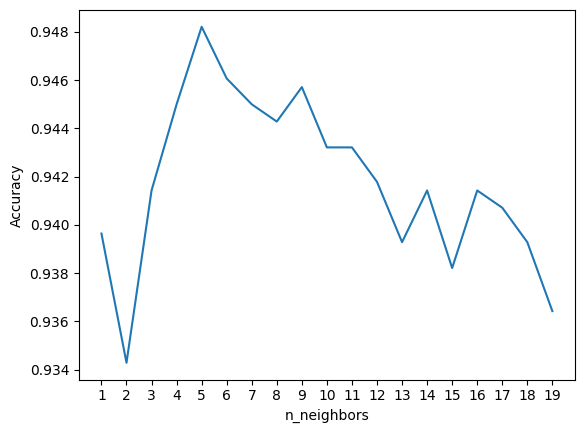

In [34]:
# Create a DataFrame from the lists
data = {'n_neighbors': neighbors_range, 'Accuracy': accuracy_values}
df = pd.DataFrame(data)

# Use Seaborn to create a line plot
sns.lineplot(x='n_neighbors', y='Accuracy', data=df)
plt.xticks(df['n_neighbors'])

# Show the plot
plt.show()

As seen in this plot we can conclude that accuracy reaches its peak at n_neighbors equal 5

In [39]:
knn = KNeighborsClassifier(n_neighbors = 5)

# Fit the model
knn.fit(hog_X_train_descriptors, train_labels)

# Make predictions in the test dataset
y_pred2 = knn.predict(hog_X_test_descriptors)

# Print accuracy
acc = accuracy_score(test_labels , y_pred2)
print("Accuracy: ", acc)

Accuracy:  0.9482142857142857


#### Logistic_Regression

In [54]:
# training on default settings/hyper parameters
logistic_classifier = LogisticRegression()
logistic_classifier.fit(hog_X_train_descriptors, train_labels)
logistic_y_pred = logistic_classifier.predict(hog_X_test_descriptors)

default_accuracy = accuracy_score(test_labels, logistic_y_pred)
default_f1 = f1_score(test_labels, logistic_y_pred, average='weighted')

C:\Users\omar\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
print(f'Accuracy on default Settings: {default_accuracy}')
print(f'F1-score on default Settings: {default_f1}')

Accuracy on default Settings: 0.9685714285714285
F1-score on default Settings: 0.968555189600702


Possible Solvers/Optimizers are [‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’]

but we will only use newton-cholesky, sag, saga, lbfgs
since we have a multiclass classification

and for C parameter this is the inverse of lamda in regularization
it controls how strict our regularization is

as C gets shrinks the regularization effect gets smaller and vice versa.
for really small C values:
the regularization is almost not there, it is more in danger to suffer from ovefitting

sometimes reasonable small C values affect the model nicely

In [18]:
# ‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’
# newton-cg, sag, saga, lbfgs
solvers = ['newton-cg', 'sag', 'saga', 'lbfgs']

# For me: None is deprecated
# penalties = ['l2']

# C controls how strict regularization is (lamda inverse) 1 / 2C
lambdas = [10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001]

# fit_intercept adds bias or not
# fit_intercept = [True, False]


# grid = dict(solver=solvers,penalty=penalties,C=C, fit_intercept=fit_intercept)
# grid_search = GridSearchCV(estimator=logistic_classifier, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(hog_X_train_descriptors, train_labels)

# grid_result.best_params_

In [19]:
# store a record for each possibility (accuracy, optimizer, Cvalue)
params = []

# to store best params that gets highest accurcay
best_accuracy: float = 0
best_solver: str = ''
best_lamda_inverse: float = 0

# try all possibilities
for solver in solvers:
    for lam in lambdas:
        logistic_classifier = LogisticRegression(solver=solver, C=lam)
        logistic_classifier.fit(hog_X_train_descriptors, train_labels)
        y_pred = logistic_classifier.predict(hog_X_test_descriptors)

        curr_accuracy = accuracy_score(test_labels, y_pred)
        curr_f1 = f1_score(test_labels, y_pred, average='weighted')
        if curr_accuracy > best_accuracy:
            best_accuracy = curr_accuracy
            best_solver = solver
            best_lamda_inverse = lam

        params.append([curr_accuracy, solver, lam, curr_f1])

print(params)

C:\Users\omar\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\omar\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\omar\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\omar\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\omar\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\omar\AppDat

[[0.9592857142857143, 'newton-cg', 10000, 0.9592269410806412], [0.9589285714285715, 'newton-cg', 1000, 0.958875384002574], [0.9621428571428572, 'newton-cg', 100, 0.9620863803270475], [0.9628571428571429, 'newton-cg', 10, 0.9628084790453995], [0.9678571428571429, 'newton-cg', 1, 0.9678439761333506], [0.9657142857142857, 'newton-cg', 0.1, 0.9656653227105452], [0.9492857142857143, 'newton-cg', 0.01, 0.9492074023316514], [0.9221428571428572, 'newton-cg', 0.001, 0.9219752118246756], [0.9621428571428572, 'sag', 10000, 0.9621000443040844], [0.9628571428571429, 'sag', 1000, 0.9628132313693263], [0.9596428571428571, 'sag', 100, 0.9596134468634975], [0.9642857142857143, 'sag', 10, 0.9642549593193457], [0.9682142857142857, 'sag', 1, 0.9682043487503531], [0.9657142857142857, 'sag', 0.1, 0.9656653227105452], [0.9492857142857143, 'sag', 0.01, 0.9492074023316514], [0.9221428571428572, 'sag', 0.001, 0.9219752118246756], [0.9635714285714285, 'saga', 10000, 0.963535161831139], [0.9639285714285715, 'saga

In [20]:
import pickle

params = np.array(params)
for i in range(len(params[:, 0])):
    params[i, 0] = np.round(float(params[i, 0]), 3)
    params[i, 3] = np.round(float(params[i, 3]), 3)


with open('logistic_params_history.pkl', 'wb') as logistic_hist:
    pickle.dump(params, logistic_hist)

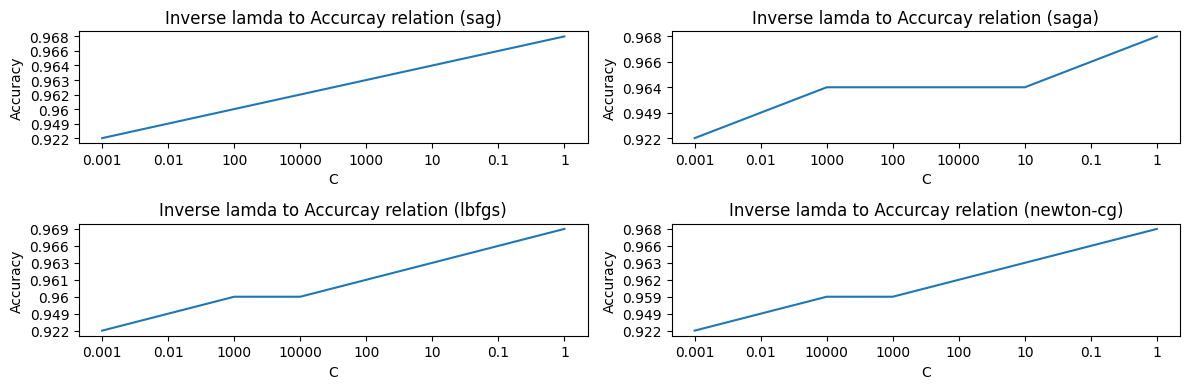

In [21]:
# Plotting relations between Inverse lamda and its effect on accuracy

params = params[params[:, 0].argsort()]
sag = params[params[:, 1] == 'sag']
saga = params[params[:, 1] == 'saga']
lbfgs = params[params[:, 1] == 'lbfgs']
newton_cg = params[params[:, 1] == 'newton-cg']

# top left plot
plt.figure(figsize=(12, 4))
plt.subplot(2, 2, 1)
plt.plot(sag[:, 2], sag[:, 0])
# plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Inverse lamda to Accurcay relation (sag)')

# top right plot
plt.subplot(2, 2, 2)
plt.plot(saga[:, 2], saga[:, 0])
# plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Inverse lamda to Accurcay relation (saga)')

# bot left plot
plt.subplot(2, 2, 3)
plt.plot(lbfgs[:, 2], lbfgs[:, 0])
# plt.xscale('log')

plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Inverse lamda to Accurcay relation (lbfgs)')

# bot right plot
plt.subplot(2, 2, 4)
plt.plot(newton_cg[:, 2], newton_cg[:, 0])
# plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Inverse lamda to Accurcay relation (newton-cg)')


plt.tight_layout()

plt.show()

From the Plots above we can conclude that:
Optimizers doesn't make much differences in our case
Inverse lamda(C) gives reasonable results from 0.1 to 10
and C=1 has the best performance
and also C=0.001 is the worst as explained above.

In [22]:
logistic_classifier = LogisticRegression(solver=best_solver, C=best_lamda_inverse)
logistic_classifier.fit(hog_X_train_descriptors, train_labels)
logistic_y_pred = logistic_classifier.predict(hog_X_test_descriptors)

logistic_accuracy = accuracy_score(test_labels, y_pred)
print(f'Highest Logistic Accuracy: {logistic_accuracy}')

Highest Logistic Accuracy: 0.9221428571428572


C:\Users\omar\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluation

In [23]:

# create confusion matrix for each model
SVM_cm = confusion_matrix(test_labels, y_pred1)
KNN_cm = confusion_matrix(test_labels, y_pred2)
logistic_cm = confusion_matrix(test_labels, logistic_y_pred)
# calculate precision, recall, f1_score for each model
## f1_score is calculated for each label and then take unweighted mean
SVM_precision, SVM_recall, SVM_score, _ = precision_recall_fscore_support(test_labels, y_pred1, average='macro')
KNN_precision, KNN_recall, KNN_score, _  = precision_recall_fscore_support(test_labels, y_pred2, average='macro')
Logistic_precision, Logistic_recall, Logistic_score, _  = precision_recall_fscore_support(test_labels, logistic_y_pred, average='macro')
print(f"SVM:(precision: {SVM_precision}, recall: {SVM_recall}, f1_score: {SVM_score})")
print(f"KNN:(precision: {KNN_precision}, recall: {KNN_recall}, f1_score: {KNN_score})")
print(f"Logistic:(precision: {Logistic_precision}, recall: {Logistic_recall}, f1_score: {Logistic_score})")

SVM:(precision: 0.9582815039925607, recall: 0.9473659623112294, f1_score: 0.9510985587781977)
KNN:(precision: 0.9487772717173943, recall: 0.9427704940251738, f1_score: 0.9447921790699623)
Logistic:(precision: 0.9690695787144399, recall: 0.967978884411021, f1_score: 0.9684379764374874)


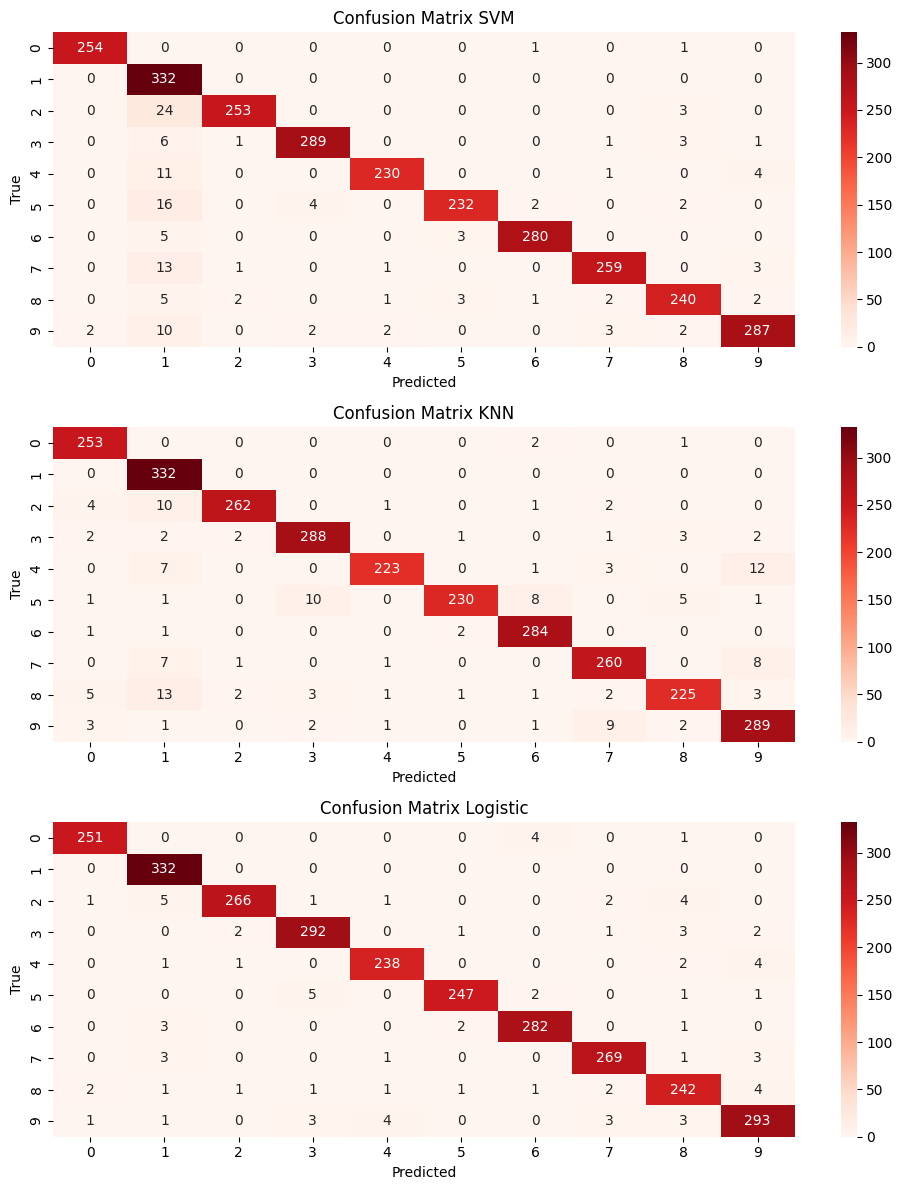

In [24]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

sns.heatmap(SVM_cm, annot=True, fmt="d", cmap="Reds", xticklabels=np.arange(10), yticklabels=np.arange(10), ax=axes[0])
axes[0].set_title('Confusion Matrix SVM')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(KNN_cm, annot=True, fmt="d", cmap="Reds", xticklabels=np.arange(10), yticklabels=np.arange(10), ax=axes[1])
axes[1].set_title('Confusion Matrix KNN')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

sns.heatmap(logistic_cm, annot=True, fmt="d", cmap="Reds", xticklabels=np.arange(10), yticklabels=np.arange(10), ax=axes[2])
axes[2].set_title('Confusion Matrix Logistic')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

plt.tight_layout()
plt.show()

## Correctness and Wrongness

### Helper

In [25]:
def plot_hog_wrong(y_model_predictions):
    correct_predictions = y_model_predictions == test_labels
    wrong_predictions = y_model_predictions != test_labels

    wrong_predicted_images = test_images[wrong_predictions][:10]

    wrong_values = y_model_predictions[wrong_predictions][:10]
    correct_values = test_labels[wrong_predictions][:10]

    for i in range(10):
        wrong_image = wrong_predicted_images[i].reshape(28,28)
        wrong_value = wrong_values[i]
        actual_value = correct_values[i]

        ft, hog_example_image = compute_hog_features(wrong_image)

        plt.figure(figsize=(8, 4))

        plt.subplot(1, 2, 1)
        plt.imshow(wrong_image, cmap='gray')
        plt.title(f'predicted {wrong_values[i]}, correct {correct_values[i]}')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(hog_example_image, cmap='gray')
        plt.title('HOG Image')
        plt.axis('off')

        plt.show()

### Models Correctness and Wrongness

first Let's take random sample from wrong predictions and correct predictions

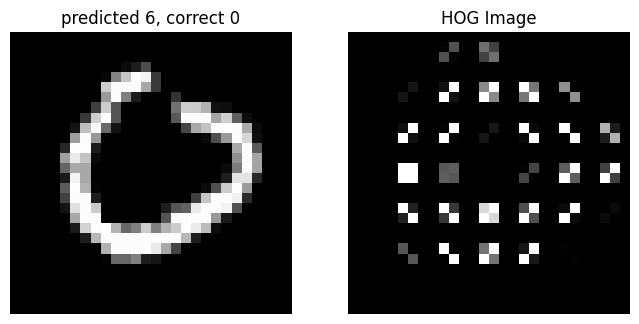

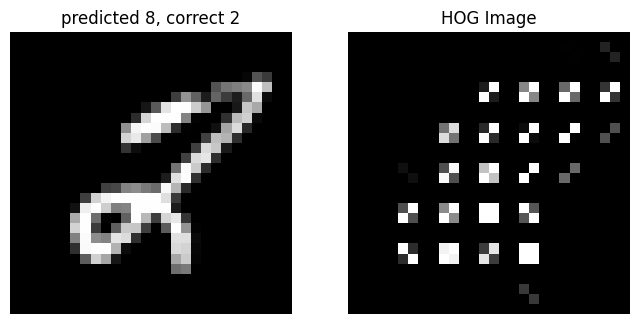

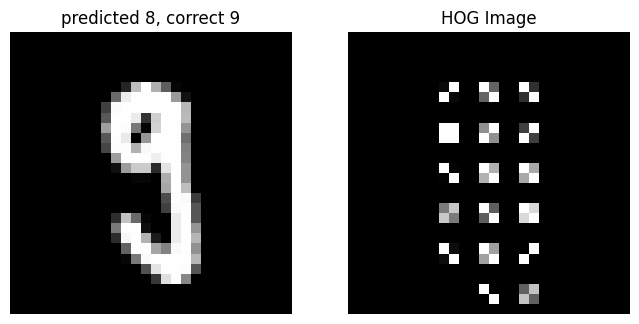

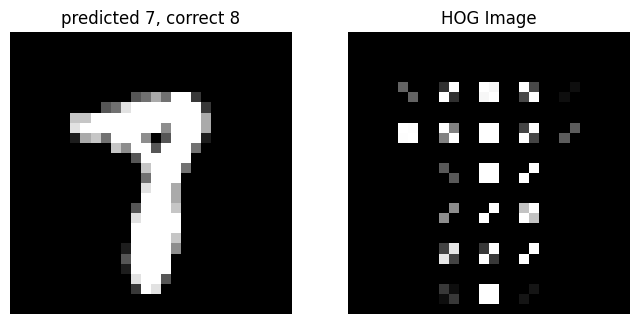

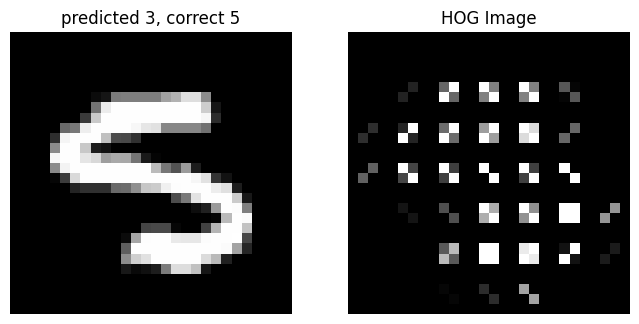

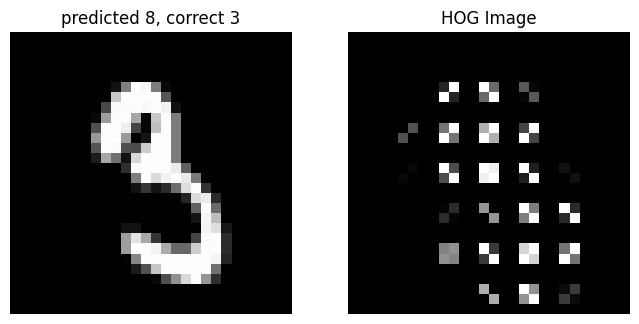

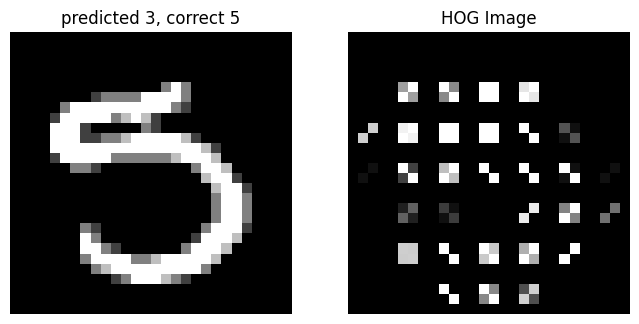

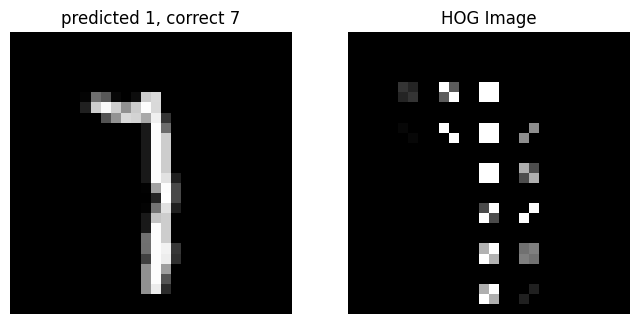

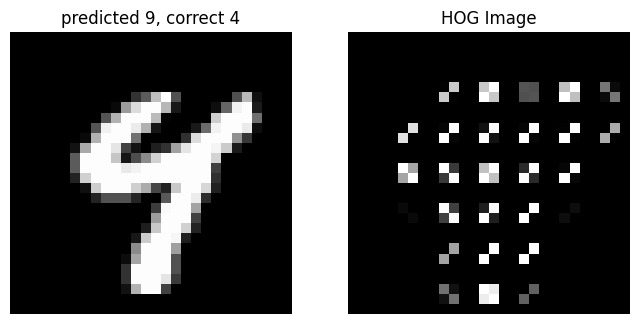

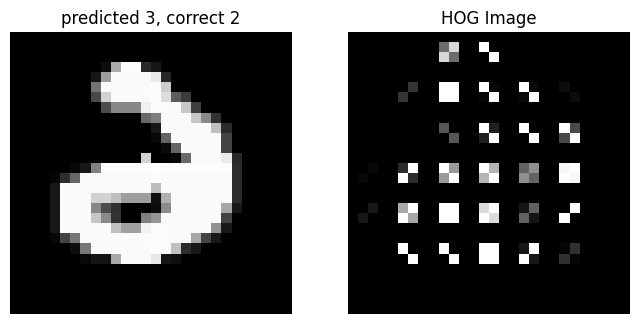

In [26]:
# get wrong predictions
# take random sample from each category (10 images)
# for wrong predictions do the following:
# -> get the True prediction value
# -> get the False prediction value
# -> get Hog feature for (True value from training set, curr image, false value from training set)
# -> get counter of numbers in training set

# Plot logistic Regression
plot_hog_wrong(logistic_y_pred)

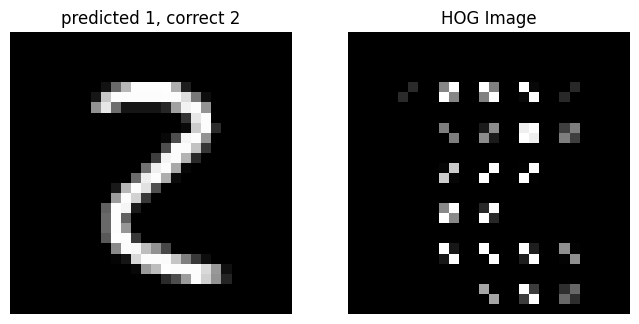

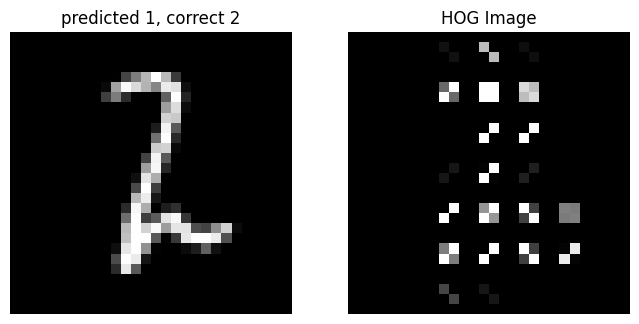

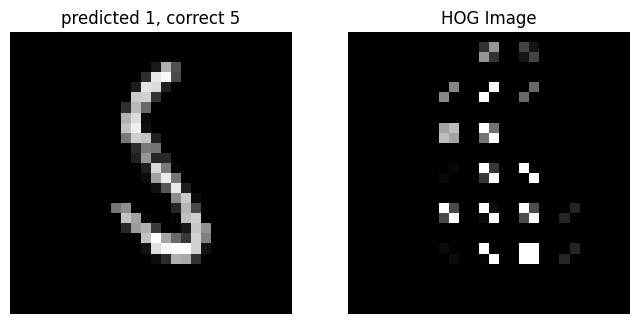

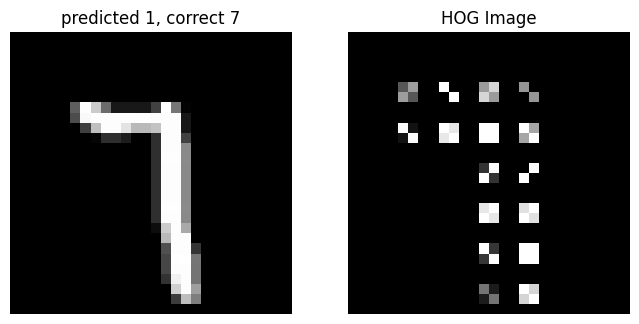

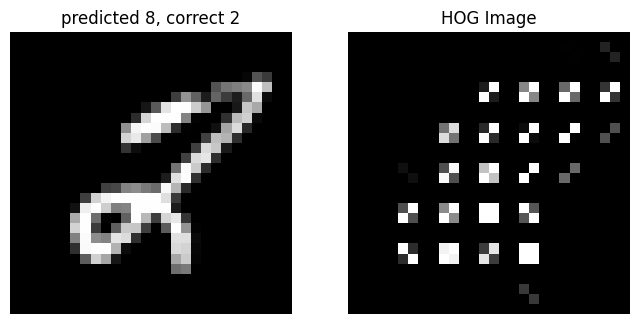

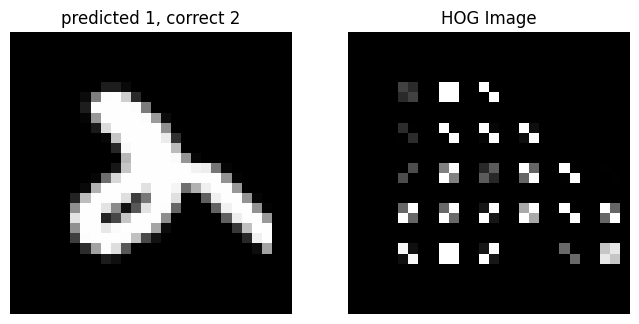

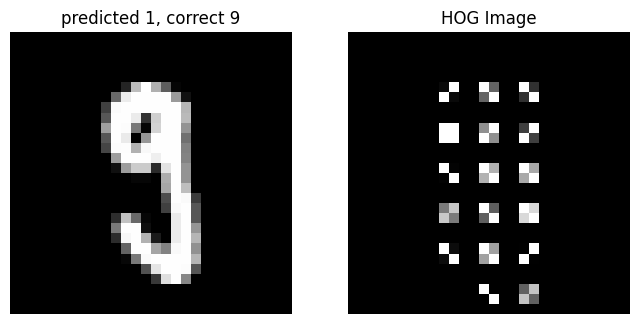

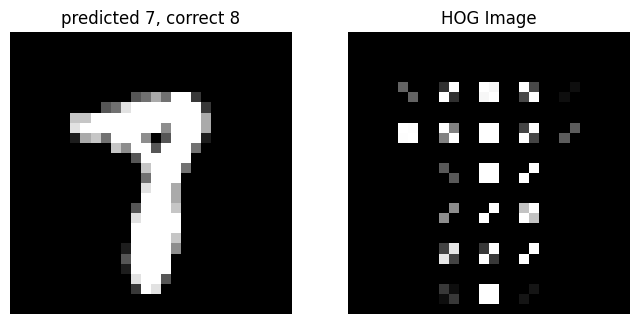

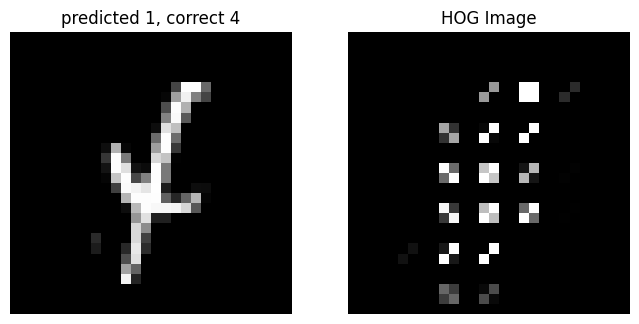

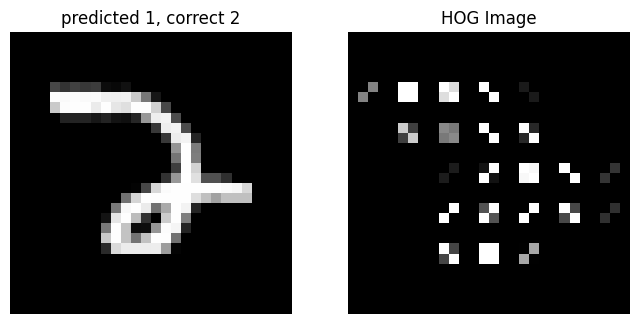

In [27]:
plot_hog_wrong(y_pred1)

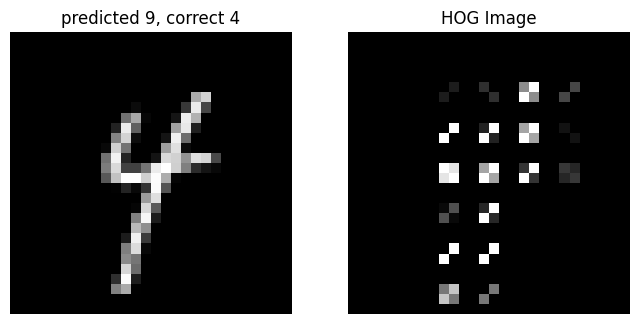

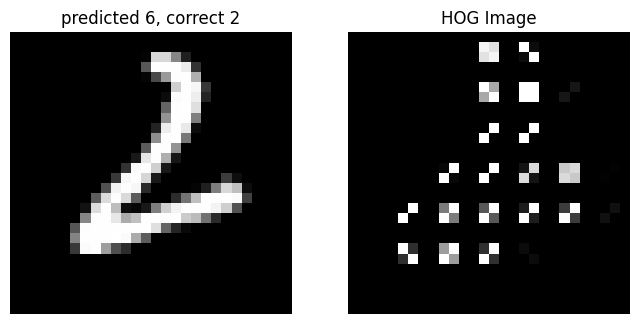

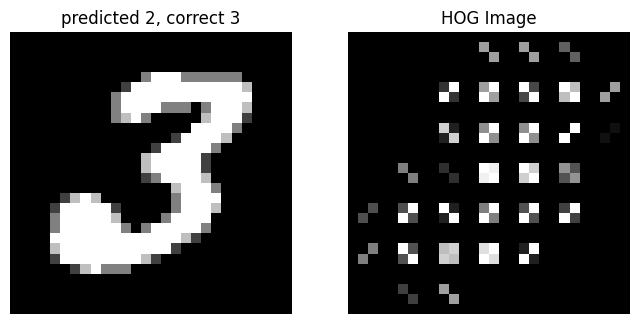

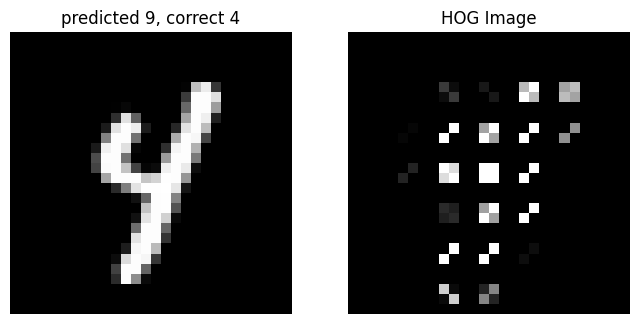

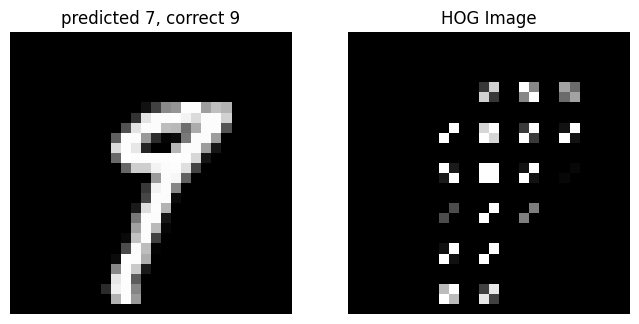

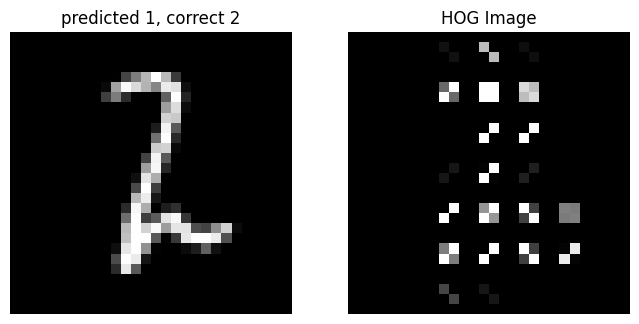

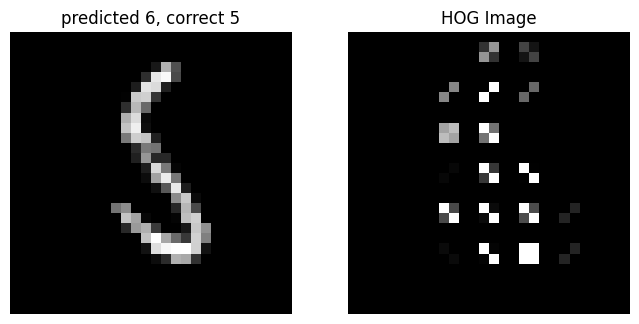

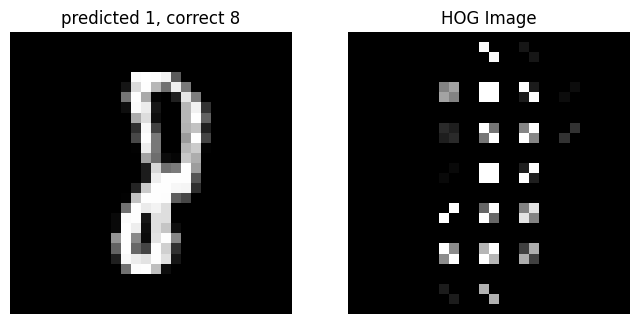

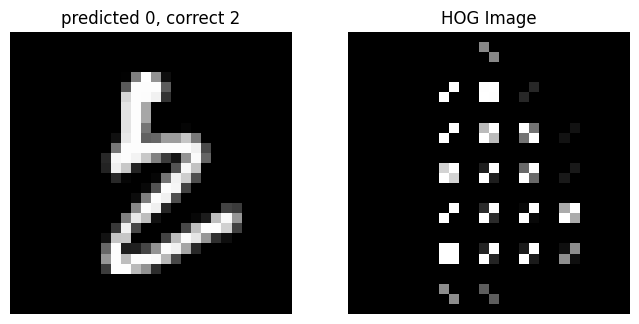

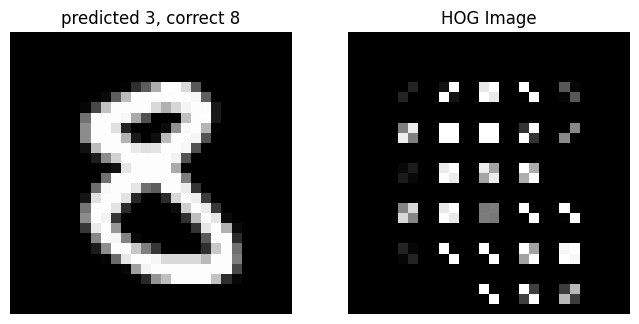

In [28]:
plot_hog_wrong(y_pred2)

### Conclusion

In [29]:
from collections import Counter
labels_count = Counter(train_labels)

for k, v in sorted(labels_count.items(), key=lambda x:x[1]):
    print(f'Number {k} has {v} Samples')

Number 5 has 1017 Samples
Number 4 has 1049 Samples
Number 0 has 1087 Samples
Number 2 has 1100 Samples
Number 8 has 1101 Samples
Number 6 has 1108 Samples
Number 9 has 1112 Samples
Number 3 has 1132 Samples
Number 7 has 1226 Samples
Number 1 has 1268 Samples


We can conclude that:
1. we can use CNNs or other pre processing tools (ex. SIFT)
2. sometimes the data isn't clear enough, these should be removed as they affect the predictions
3. the count of training some values is more and that can affect the output we can also see this from above (when hog features gives bad results its more likely to be biased to a number that seems like the features with more samples)